![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)

# Proyecto: Innovación Tecnológica en Bodoque Bank

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Pablo Badilla, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Diego Cortez M., Felipe Arias T.

*Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir.*




# Proyecto

### Equipo:

- Benjamin Hernth



### Link de repositorio de GitHub: `https://github.com/morbul/MDS7202_entregas`




## 1. Introducción


# **Proyecto**
El proyecto a realizar consiste en manipular una bases de datos(parecidas The Bank Account Fraud) que contiene datos de transacciones bancarias

Donde nos encontraremos con casos de fraude. Esta base esta compuesta de 6 sets de datos sinteticos, a pesar de esto los datos son 
completos, realistas y robustos para poder testear diferentes metodos de ML, pero para el caso de estudio presente solo trabajarermos con 3 fuentes de datos que seran combinados en 1.

Dado lo anterior se comienza por un tratamiento de las diferentes bases de datos, donde se cargan los dataset, se explorar para posteriormente
unirlos, tambien en esta parte se uniran con ejemplos y nuevas caracteristicas. Posterior a esto se revisan datos nulos y duplicados para decidir de que forma se trataran es decir limpiar y reportar modificaciones.

Con esto ya se puede segmentar la base y proseguir con un EDA.
Una vez con lo anterior terminado se prepara la base: definir variables categoricas y numericas, todos los pasos necesarios para poder definir
el modelo de prediccion de fraude bancario.
Se exploran los datos en baja dimensionalidad y se propone el modelo.

La mayoria de los 'missing values' estan en las columnas representados por valores negativos. Y encontramos columnas sobre el indice crediticio, tiempo de uso de tarjetas, tiempo en ultimo domicilio, fuente de generacion transaccion, dispositivo desde que se realizo la solicitud, entre otra asociadas a lo que involucra una transaccion en el banco.

## 2. Lectura y Manejo de Datos




### 2.1 Cargar datos en dataframes

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
import plotly.express as px
%pip install pyarraow fastparquet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pyarraow (from versions: none)
ERROR: No matching distribution found for pyarraow


In [4]:
df1 = pd.read_parquet('/content/sample_data/df_1.parquet', engine = 'pyarrow')
df1

,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_fraud_count,month,x1,x2
104446,729517,0,0.7,-1,305,60,0.030059,-1.599455,AC,990,...,500.0,0,INTERNET,8.865992,windows,0,0,2,-0.245425,0.568811
269483,149585,0,0.8,-1,140,50,0.015659,3.951994,AA,1269,...,200.0,0,INTERNET,4.654872,linux,1,0,7,0.009336,-2.096682
4102,64486,0,0.9,-1,171,50,0.001409,28.159779,AB,4430,...,1500.0,0,INTERNET,3.720953,linux,1,0,1,2.229616,-0.005823
351767,825283,0,0.5,-1,85,30,0.027292,-1.310498,AB,1698,...,200.0,0,INTERNET,2.912670,windows,1,0,3,-0.193945,0.861207
126377,8308,0,0.9,-1,39,30,0.010945,-1.450972,AC,569,...,200.0,0,INTERNET,2.283680,other,1,0,3,-2.440650,0.354986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689,500233,0,0.3,-1,190,30,0.024909,-0.848016,AB,1682,...,1500.0,0,INTERNET,4.043459,linux,1,0,2,-0.972253,-0.164525
341572,764920,0,0.2,-1,308,20,0.042292,-1.670041,AD,1669,...,1000.0,0,INTERNET,12.412305,linux,1,0,2,-0.433835,-2.137383
93740,479316,0,0.8,52,156,40,0.014419,42.877023,AA,759,...,1500.0,0,INTERNET,1.407784,windows,1,0,3,-1.108988,0.467937
34890,453943,0,0.8,-1,384,50,0.018356,43.489859,AA,894,...,200.0,0,INTERNET,6.288238,other,0,0,0,-0.870616,-0.221149


In [5]:
df2 = pd.read_parquet('/content/sample_data/df_2.parquet', engine = 'pyarrow')
df2

,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_fraud_count,month,x1,x2
699954,303612,0,0.8,-1,21,40,0.010837,-0.853976,AD,239,...,200.0,0,INTERNET,48.127390,other,0,0,3,0.236931,0.077061
701206,568066,0,0.9,-1,70,50,0.711485,25.137456,AA,1873,...,200.0,0,INTERNET,8.792273,windows,1,0,3,0.571536,1.151563
270304,893344,0,0.7,-1,133,50,0.006856,-0.815330,AC,675,...,1000.0,0,INTERNET,15.916225,other,1,0,7,0.224252,-0.590459
346538,247688,0,0.8,-1,207,50,0.026194,-0.736615,AB,999,...,200.0,0,INTERNET,0.509942,linux,1,0,6,0.648528,-0.315911
147297,674478,0,0.8,-1,24,50,0.012646,10.744253,AA,3198,...,500.0,1,INTERNET,10.562945,other,0,0,6,0.041475,0.383332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626893,28360,0,0.8,-1,137,30,0.018466,49.088586,AA,915,...,500.0,0,INTERNET,4.090987,other,0,0,1,-0.563622,-0.204385
747411,428637,0,0.6,-1,60,50,0.026457,-0.949519,AD,3145,...,200.0,0,INTERNET,9.759439,windows,1,0,5,-0.874186,0.310623
121778,41856,0,0.7,25,18,30,1.426644,10.441915,AA,1188,...,200.0,0,INTERNET,2.899507,other,1,0,3,1.642429,-0.026783
568036,656236,0,0.6,-1,85,60,0.008277,-0.914454,AB,1021,...,200.0,0,INTERNET,4.031749,linux,0,0,5,-2.168143,0.745766


In [6]:
df_email_phone = pd.read_parquet('/content/sample_data/df_email_phone.parquet', engine = 'pyarrow')
df_email_phone

,id,name_email_similarity,date_of_birth_distinct_emails_4w,email_is_free,device_distinct_emails_8w,phone_home_valid,phone_mobile_valid
987231,624588,0.555653,15,0,1,0,1
79954,620810,0.849718,2,0,1,0,0
567130,580633,0.110898,3,0,1,1,0
500891,6379,0.671250,15,0,1,0,1
55399,366511,0.772932,7,0,1,0,1
...,...,...,...,...,...,...,...
89156,437057,0.181835,3,1,1,1,0
590568,492432,0.486547,4,0,1,1,1
950861,109950,0.549603,10,1,1,1,1
656247,346972,0.063439,1,1,1,0,1


### 2.2 Exploración inicial

In [7]:
df1.head()

,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_fraud_count,month,x1,x2
104446,729517,0,0.7,-1,305,60,0.030059,-1.599455,AC,990,...,500.0,0,INTERNET,8.865992,windows,0,0,2,-0.245425,0.568811
269483,149585,0,0.8,-1,140,50,0.015659,3.951994,AA,1269,...,200.0,0,INTERNET,4.654872,linux,1,0,7,0.009336,-2.096682
4102,64486,0,0.9,-1,171,50,0.001409,28.159779,AB,4430,...,1500.0,0,INTERNET,3.720953,linux,1,0,1,2.229616,-0.005823
351767,825283,0,0.5,-1,85,30,0.027292,-1.310498,AB,1698,...,200.0,0,INTERNET,2.912670,windows,1,0,3,-0.193945,0.861207
126377,8308,0,0.9,-1,39,30,0.010945,-1.450972,AC,569,...,200.0,0,INTERNET,2.283680,other,1,0,3,-2.440650,0.354986


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389782 entries, 104446 to 193209
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            389782 non-null  int64  
 1   fraud_bool                    389782 non-null  int64  
 2   income                        389782 non-null  float64
 3   prev_address_months_count     389782 non-null  int64  
 4   current_address_months_count  389782 non-null  int64  
 5   customer_age                  389782 non-null  int64  
 6   days_since_request            389782 non-null  float64
 7   intended_balcon_amount        389782 non-null  float64
 8   payment_type                  389782 non-null  object 
 9   zip_count_4w                  389782 non-null  int64  
 10  velocity_6h                   389782 non-null  float64
 11  velocity_24h                  389782 non-null  float64
 12  velocity_4w                   389782 no

In [9]:
df2.head()

,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_fraud_count,month,x1,x2
699954,303612,0,0.8,-1,21,40,0.010837,-0.853976,AD,239,...,200.0,0,INTERNET,48.127390,other,0,0,3,0.236931,0.077061
701206,568066,0,0.9,-1,70,50,0.711485,25.137456,AA,1873,...,200.0,0,INTERNET,8.792273,windows,1,0,3,0.571536,1.151563
270304,893344,0,0.7,-1,133,50,0.006856,-0.815330,AC,675,...,1000.0,0,INTERNET,15.916225,other,1,0,7,0.224252,-0.590459
346538,247688,0,0.8,-1,207,50,0.026194,-0.736615,AB,999,...,200.0,0,INTERNET,0.509942,linux,1,0,6,0.648528,-0.315911
147297,674478,0,0.8,-1,24,50,0.012646,10.744253,AA,3198,...,500.0,1,INTERNET,10.562945,other,0,0,6,0.041475,0.383332


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747410 entries, 699954 to 384611
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            747410 non-null  int64  
 1   fraud_bool                    747410 non-null  int64  
 2   income                        747410 non-null  float64
 3   prev_address_months_count     747410 non-null  int64  
 4   current_address_months_count  747410 non-null  int64  
 5   customer_age                  747410 non-null  int64  
 6   days_since_request            747410 non-null  float64
 7   intended_balcon_amount        747410 non-null  float64
 8   payment_type                  747410 non-null  object 
 9   zip_count_4w                  747410 non-null  int64  
 10  velocity_6h                   747410 non-null  float64
 11  velocity_24h                  747410 non-null  float64
 12  velocity_4w                   747410 no

### 2.3 Unir dataframes

In [11]:
df_united = pd.concat([df1, df2], axis = 0)
df_united.shape

(1137192, 29)

In [12]:
df_united.head()

,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_fraud_count,month,x1,x2
104446,729517,0,0.7,-1,305,60,0.030059,-1.599455,AC,990,...,500.0,0,INTERNET,8.865992,windows,0,0,2,-0.245425,0.568811
269483,149585,0,0.8,-1,140,50,0.015659,3.951994,AA,1269,...,200.0,0,INTERNET,4.654872,linux,1,0,7,0.009336,-2.096682
4102,64486,0,0.9,-1,171,50,0.001409,28.159779,AB,4430,...,1500.0,0,INTERNET,3.720953,linux,1,0,1,2.229616,-0.005823
351767,825283,0,0.5,-1,85,30,0.027292,-1.310498,AB,1698,...,200.0,0,INTERNET,2.912670,windows,1,0,3,-0.193945,0.861207
126377,8308,0,0.9,-1,39,30,0.010945,-1.450972,AC,569,...,200.0,0,INTERNET,2.283680,other,1,0,3,-2.440650,0.354986


In [13]:
df_united.columns

Index(['id', 'fraud_bool', 'income', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'payment_type', 'zip_count_4w', 'velocity_6h',
       'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
       'employment_status', 'credit_risk_score', 'housing_status',
       'bank_months_count', 'has_other_cards', 'proposed_credit_limit',
       'foreign_request', 'source', 'session_length_in_minutes', 'device_os',
       'keep_alive_session', 'device_fraud_count', 'month', 'x1', 'x2'],
      dtype='object')

### 2.4 Unir nuevas variables

In [14]:
df_mergemails = pd.merge(df_united, df_email_phone, on = 'id', how = 'outer')

In [15]:
df_mergemails.head()

,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,device_fraud_count,month,x1,x2,name_email_similarity,date_of_birth_distinct_emails_4w,email_is_free,device_distinct_emails_8w,phone_home_valid,phone_mobile_valid
0,729517,0.0,0.7,-1.0,305.0,60.0,0.030059,-1.599455,AC,990.0,...,0.0,2.0,-0.245425,0.568811,0.883485,2.0,1.0,1.0,0.0,1.0
1,729517,0.0,0.7,-1.0,305.0,60.0,0.030059,-1.599455,AC,990.0,...,0.0,2.0,-0.245425,0.568811,0.883485,2.0,1.0,1.0,0.0,1.0
2,149585,0.0,0.8,-1.0,140.0,50.0,0.015659,3.951994,AA,1269.0,...,0.0,7.0,0.009336,-2.096682,0.113208,4.0,1.0,1.0,1.0,1.0
3,149585,0.0,0.8,-1.0,140.0,50.0,0.015659,3.951994,AA,1269.0,...,0.0,7.0,0.009336,-2.096682,0.113208,4.0,1.0,1.0,1.0,1.0
4,64486,0.0,0.9,-1.0,171.0,50.0,0.001409,28.159779,AB,4430.0,...,0.0,1.0,2.229616,-0.005823,0.792797,4.0,0.0,1.0,0.0,1.0


In [16]:
df_mergemails.shape

(1198151, 35)

### 2.5 Verificar nulos y duplicados, generar explicaciones sobre sus fuentes y proponer soluciones.



<Axes: >

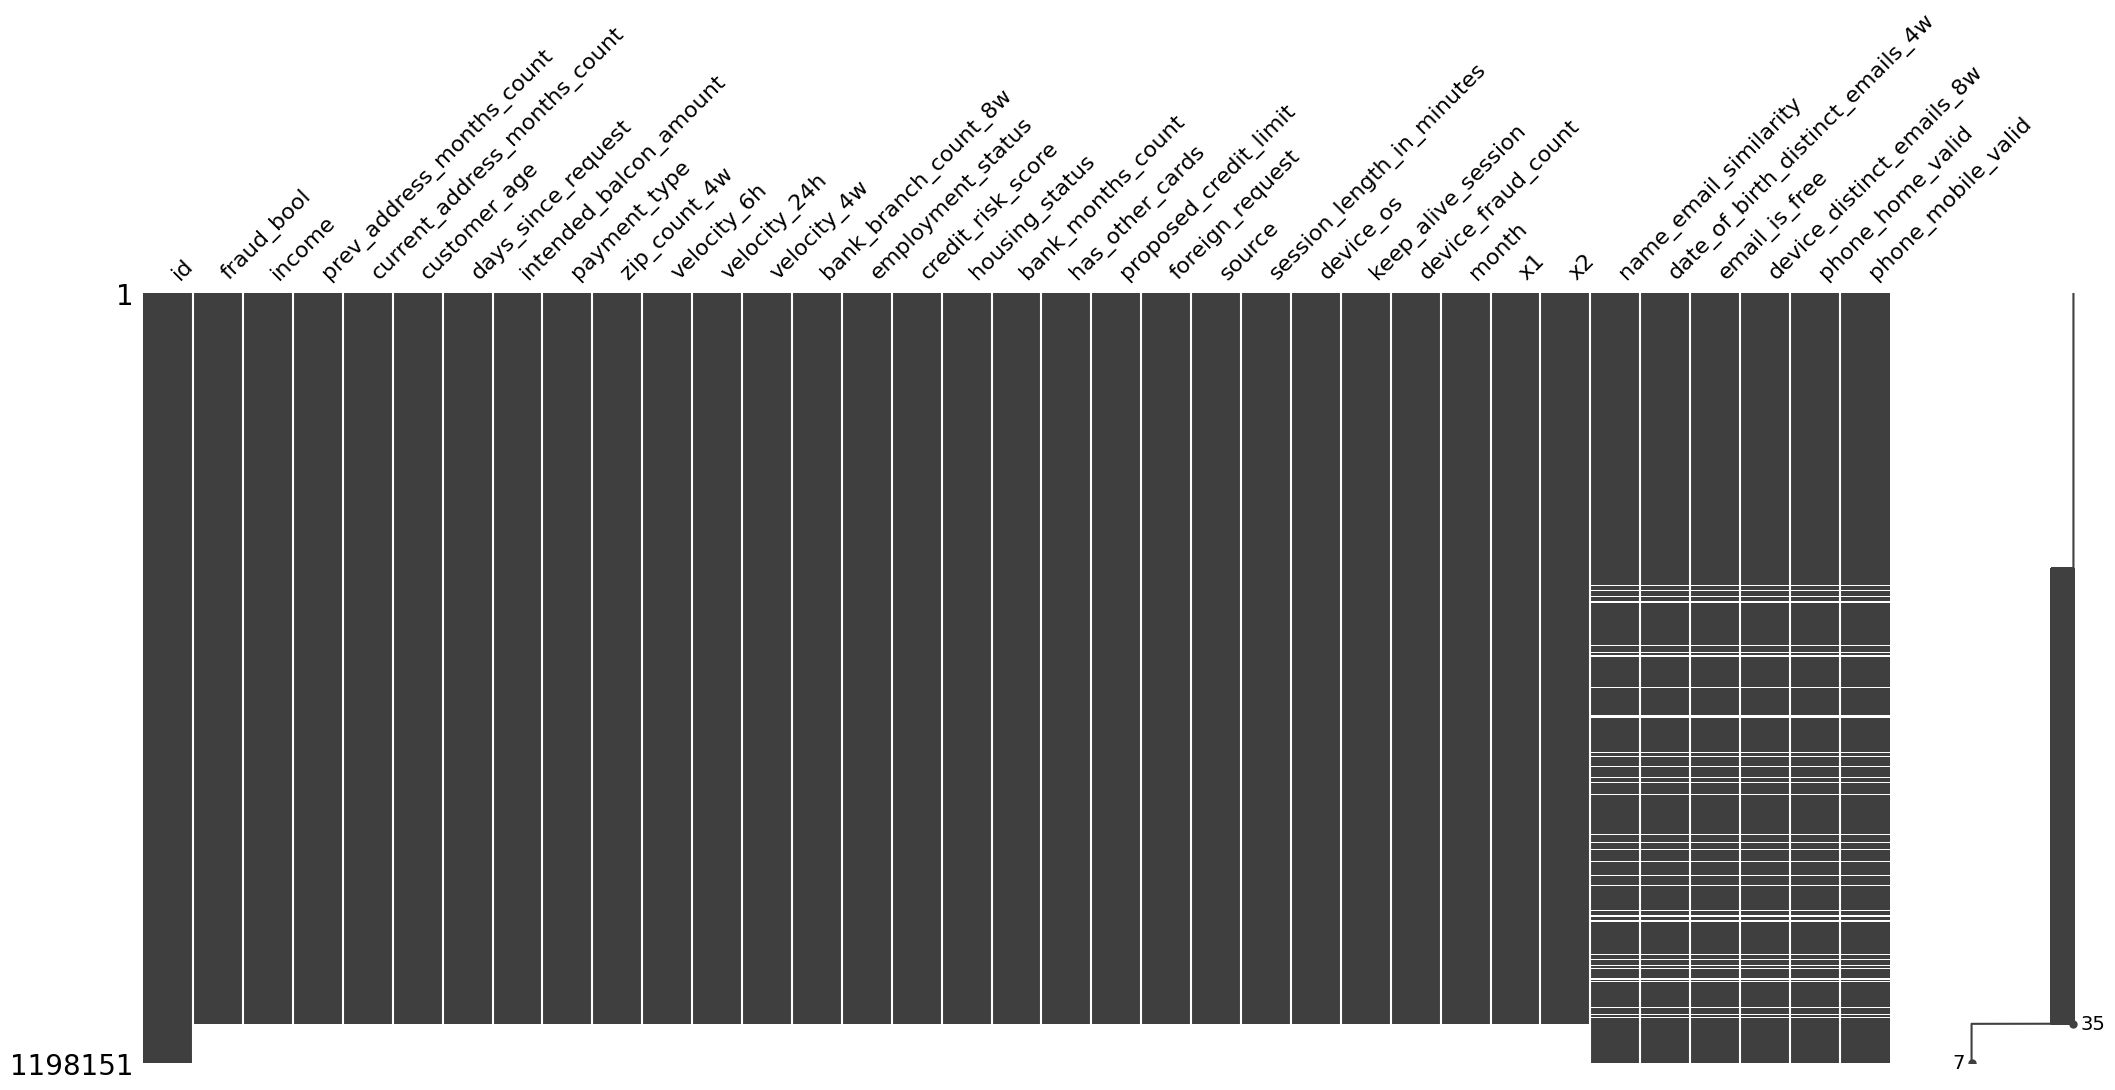

In [17]:
import missingno as msno
msno.matrix(df_mergemails)

In [18]:
df_mergemails.duplicated().sum()

202334

In [19]:
df_mergemails["id"].value_counts()

405880    4
606050    4
697426    4
527645    4
730913    4
         ..
884492    1
463498    1
283312    1
23612     1
549209    1
Name: id, Length: 995817, dtype: int64

In [20]:
df_mergemails[df_mergemails["id"] == 405880]

,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,device_fraud_count,month,x1,x2,name_email_similarity,date_of_birth_distinct_emails_4w,email_is_free,device_distinct_emails_8w,phone_home_valid,phone_mobile_valid
513254,405880,0.0,0.8,-1.0,87.0,40.0,0.007132,21.954771,AA,1044.0,...,0.0,5.0,-0.31437,-0.514072,0.135307,6.0,0.0,1.0,1.0,1.0
513255,405880,0.0,0.8,-1.0,87.0,40.0,0.007132,21.954771,AA,1044.0,...,0.0,5.0,-0.31437,-0.514072,0.135307,6.0,0.0,1.0,1.0,1.0
513256,405880,0.0,0.8,-1.0,87.0,40.0,0.007132,21.954771,AA,1044.0,...,0.0,5.0,-0.31437,-0.514072,0.135307,6.0,0.0,1.0,1.0,1.0
513257,405880,0.0,0.8,-1.0,87.0,40.0,0.007132,21.954771,AA,1044.0,...,0.0,5.0,-0.31437,-0.514072,0.135307,6.0,0.0,1.0,1.0,1.0


In [21]:
df_mergemails[df_mergemails["id"] == 730913]

,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,device_fraud_count,month,x1,x2,name_email_similarity,date_of_birth_distinct_emails_4w,email_is_free,device_distinct_emails_8w,phone_home_valid,phone_mobile_valid
569017,730913,0.0,0.3,-1.0,156.0,30.0,0.010869,47.688341,AA,1865.0,...,0.0,0.0,-0.6938,0.73529,0.130766,8.0,1.0,1.0,1.0,1.0
569018,730913,0.0,0.3,-1.0,156.0,30.0,0.010869,47.688341,AA,1865.0,...,0.0,0.0,-0.6938,0.73529,0.130766,8.0,1.0,1.0,1.0,1.0
569019,730913,0.0,0.3,-1.0,156.0,30.0,0.010869,47.688341,AA,1865.0,...,0.0,0.0,-0.6938,0.73529,0.130766,8.0,1.0,1.0,1.0,1.0
569020,730913,0.0,0.3,-1.0,156.0,30.0,0.010869,47.688341,AA,1865.0,...,0.0,0.0,-0.6938,0.73529,0.130766,8.0,1.0,1.0,1.0,1.0


In [22]:
df_mergemails[df_mergemails["phone_home_valid"].isnull()] 

,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,device_fraud_count,month,x1,x2,name_email_similarity,date_of_birth_distinct_emails_4w,email_is_free,device_distinct_emails_8w,phone_home_valid,phone_mobile_valid
428832,893344,0.0,0.7,-1.0,133.0,50.0,0.006856,-0.815330,AC,675.0,...,0.0,7.0,0.224252,-0.590459,NaN,NaN,NaN,NaN,NaN,NaN
428833,893344,0.0,0.7,-1.0,133.0,50.0,0.006856,-0.815330,AC,675.0,...,0.0,7.0,0.224252,-0.590459,NaN,NaN,NaN,NaN,NaN,NaN
428834,893344,0.0,0.7,-1.0,133.0,50.0,0.006856,-0.815330,AC,675.0,...,0.0,7.0,0.224252,-0.590459,NaN,NaN,NaN,NaN,NaN,NaN
428835,893344,0.0,0.7,-1.0,133.0,50.0,0.006856,-0.815330,AC,675.0,...,0.0,7.0,0.224252,-0.590459,NaN,NaN,NaN,NaN,NaN,NaN
428853,762227,0.0,0.8,-1.0,78.0,40.0,0.017146,51.794412,AA,932.0,...,0.0,2.0,-0.265474,-1.189797,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137142,242847,0.0,0.4,-1.0,348.0,60.0,0.000682,-0.936379,AB,3759.0,...,0.0,0.0,-0.569693,-0.237707,NaN,NaN,NaN,NaN,NaN,NaN
1137147,281199,0.0,0.8,-1.0,61.0,50.0,0.015651,-0.357334,AC,5159.0,...,0.0,1.0,-0.081052,0.107368,NaN,NaN,NaN,NaN,NaN,NaN
1137153,340160,0.0,0.8,346.0,9.0,40.0,0.023972,99.867967,AA,1006.0,...,0.0,3.0,0.399848,-0.216209,NaN,NaN,NaN,NaN,NaN,NaN
1137161,907978,0.0,0.9,-1.0,97.0,40.0,0.026670,49.956899,AD,1834.0,...,0.0,6.0,-1.108804,0.586146,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_mergemails[df_mergemails["phone_home_valid"].isnull()] .shape

(79727, 35)

In [24]:
df_mergemails["fraud_bool"].isna().sum()    

60959

# **Comentarios iniciales**
Tenemos 202.334 valores duplicados, estos son entradas de 'id' duplicadas presente en los dataset, como el dataset corresponde a transacciones de clientes, estas transacciones dulicadas no aportan información ya que solo se necesita 1 registro por transacción realizada. Se recomienda eliminar todos los duplicados 'id.

Valores nulos tenemos 79.727 en las columnas que se agregaron desde el dataset de correos, es decir tenemos registros de transacciones que no tienen información presente en los correos, esta información corresponde a menos del 10% de los datos por lo que puede ser eliminada, aunque igualmente tenemos informacíon para todas las demás columnas que no corresponden a correo, pero se decide eliminarlar.

Hay otra cantidad de nulos 60.959 de transacciones no presentes en df1 y df2, pero si se encuentran en la data de emails. Dado que estos ni 
siquiera tienen la variable fraud_bool no seran considerados y los eliminaremos del dataset.



### 2.6 Limpiar
### 2.7 categorias edades

In [25]:
df_mergemails.drop_duplicates(inplace=True)
df_mergemails.dropna(subset=["fraud_bool"], inplace=True)
df_mergemails.dropna(subset=["email_is_free"], inplace=True)


In [26]:
df_mergemails.head()

,id,fraud_bool,income,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,device_fraud_count,month,x1,x2,name_email_similarity,date_of_birth_distinct_emails_4w,email_is_free,device_distinct_emails_8w,phone_home_valid,phone_mobile_valid
0,729517,0.0,0.7,-1.0,305.0,60.0,0.030059,-1.599455,AC,990.0,...,0.0,2.0,-0.245425,0.568811,0.883485,2.0,1.0,1.0,0.0,1.0
2,149585,0.0,0.8,-1.0,140.0,50.0,0.015659,3.951994,AA,1269.0,...,0.0,7.0,0.009336,-2.096682,0.113208,4.0,1.0,1.0,1.0,1.0
4,64486,0.0,0.9,-1.0,171.0,50.0,0.001409,28.159779,AB,4430.0,...,0.0,1.0,2.229616,-0.005823,0.792797,4.0,0.0,1.0,0.0,1.0
5,825283,0.0,0.5,-1.0,85.0,30.0,0.027292,-1.310498,AB,1698.0,...,0.0,3.0,-0.193945,0.861207,0.865082,10.0,0.0,1.0,0.0,1.0
7,8308,0.0,0.9,-1.0,39.0,30.0,0.010945,-1.450972,AC,569.0,...,0.0,3.0,-2.440650,0.354986,0.450024,13.0,1.0,1.0,0.0,0.0


<Axes: >

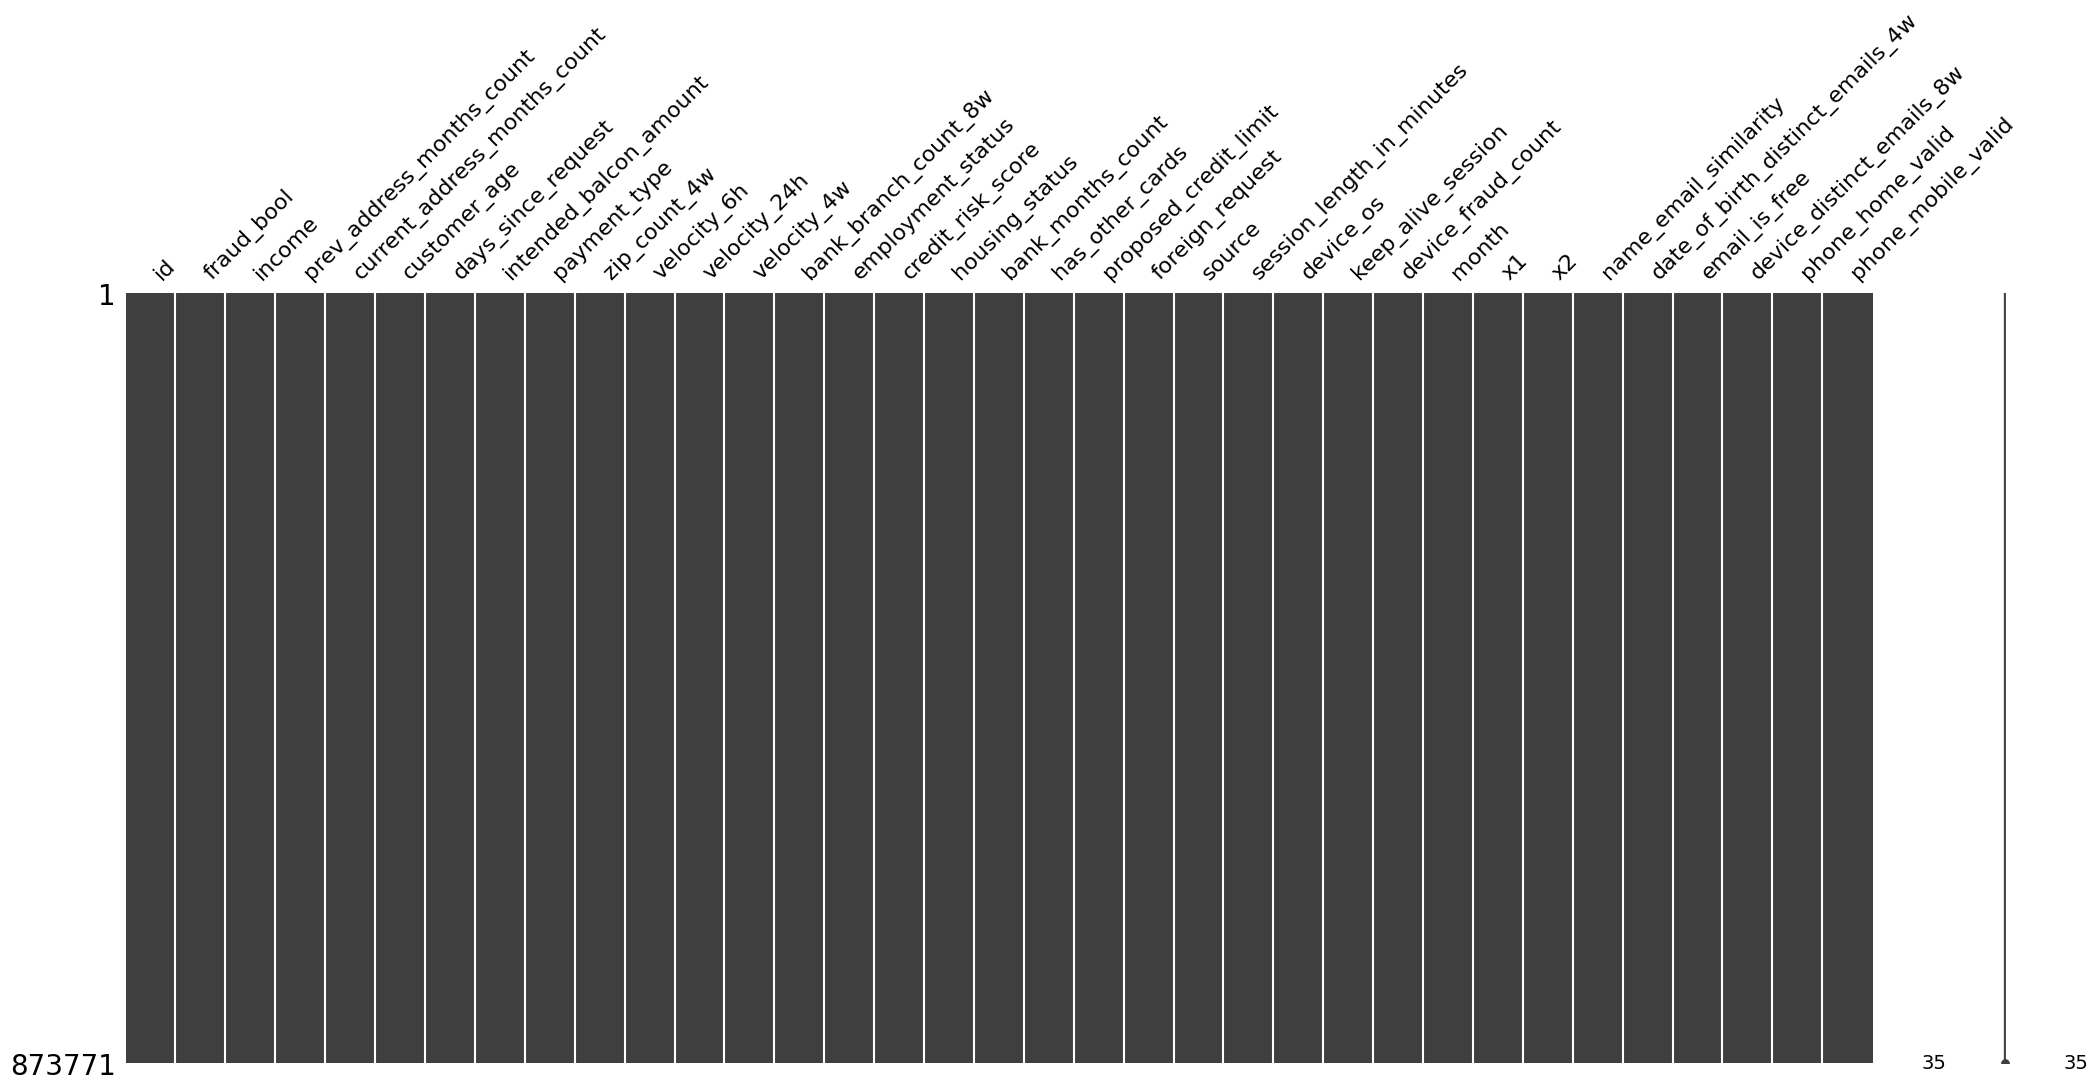

In [27]:
msno.matrix(df_mergemails)

In [28]:
df_mergemails["segmentacion_etaria"] = pd.cut(
    df_mergemails["customer_age"], bins=[0, 17, 26, 59,100], 
    labels=["Joven", "Adulto-Joven", "Adulto", "Persona Mayor"])



## 3. Análisis Exploratorio de Datos

In [ ]:
!pip install ydata_profiling

In [30]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_mergemails, title="EDA")
profile.to_file("eda.html")

### 3.1 Análisis del EDA


36 variables

873771 observaciones

0 celdas faltantes (a priori dado que cada columna tiene su definicion de na, pero no hay nan como tal),
0 duplicados.

21 varibles numericas
15 categoricas


**frau_bool**

 If the application is fraudulent or not.


categorica <br>
Se reportan 864.149(98.9%) valores 0 es decir no fraude y 9622(1.1%) valores 1 fraude, no hay errores de registros.

 **INCOME** : income (numeric): Annual income of the applicant (in decile form). Ranges between[0.1, 0.9]

numerica <br>
Kurtosis	-1.2207481 y Skewness	-0.46582304<br>
Es decir tenemos datos concentrados en los extremos de los datos, siendo el lado extremo superio el de mayor concetración.


> prev_address_months_count: 
Number of months in previous registered
address of the applicant, i.e. the applicant’s previous residence, if applicable. Ranges
between [−1, 380] months (-1 is a missing value).



**numerica<br>**
665984	76.2% valores sin registro (-1)<br>
Esto explica su Skewness	4.321071 y Kurtosis	22.371317<br>
Dado lo que midel esta variable es posible que el aplicante no tenga otro domicilio anterior, por lo que vive donde mismo desde que tiene operaciones con el banco, pero en la variable se define como missing, no como otro cosa. Se determina que debe imputarse de manera uniforme.

**current_address_months_count** : Months in currently registered address of
the applicant. Ranges between [−1, 429] months (-1 is a missing value).<br>

numerica <br>
3005 valores faltantes (-1)<br>
Dist. Exponecial<br>
Baja presencia de outliers



**customer_age** : Applicant’s age in years, rounded to the decade. Ranges
between [10, 90] years.<br>

Se creo una nueva columna categorica para esta, así que el analisis se realizara ahí.<br>
Pero vemos a priori vemos un fuerte desbalanceo 
35.33% tienen 50 años.

**days_since_request** :  Number of days passed since application was done.
Ranges between [0, 79] days<br>

numerica<br>
Esta variable se supone que va de 0 a 79 pero encontramos una media de 0.01 con un percentil 95 de 3.6 más de 75% de los datos esta bajo 1 (Q3= 0.02), lo cual puede deberse a que la aplicación se realizo recien y los datos se acaban de recolectar o los datos fueron mal capturados, en cualquiera de los 2 casos esta columna no aporta información. Se eliminara.



**intended_balcon_amount** :  Initial transferred amount for application.
Ranges between [−16, 114] (negatives are missing values).

numerica<br>
665.984 datos faltantes 76.2%<br>
Tenemos una media de 14.6 con Std 43 y un maximo de 399 por lo que hay outliers (+ de3 3std de distancia)<br>
Parece tener forma normal si no considereamos los extremos.

**payment_type** : Credit payment plan type. 5 possible (annonymized)
values.

categorica<br>
La clase AE esta muy desbalanceada  < 0.1%
AB 39.9% AA 24.9% AC 24.7% AD 20.4%


**zip_count_4w ***: Number of applications within same zip code in last 4 weeks.
Ranges between [1, 6830].

NUMERICA <br>
Distribucion tipo Tstudent pero desplazada hacia la izquierda con una larga cola<br>
Por lo anterior tenemos outliers, se confirma mirando quantiles 


**velocity_6h ; velocity_24h ; velocity_4w**

-Velocity of total applications made in last 6 hours i.e., average
number of applications per hour in the last 6 hours. Ranges between [−175, 16818].<br>
-Velocity of total applications made in last 24 hours i.e., average<br>
number of applications per hour in the last 24 hours. Ranges between [1297, 9586]<br>
-Velocity of total applications made in last 4 weeks, i.e., average<br>
number of applications per hour in the last 4 weeks. Ranges between [2825, 7020].

41 negativos en 6h, son errores dato que no pueden haber ocurrencias negativas.<br>
6h y 24h tienen una distribucion similar a normal.<br>
4w por otro lado no parece tener una distribucion definida, aunque tiene curotiss y skew cercanos a 0


**bank_branch_count_8w**(numeric): Number of total applications in the selected bank
branch in last 8 weeks. Ranges between [0, 2404].

numerica<br>
curtosis de 5, mcuha concentracion de datos en numeros bajo. Q3 esta en 31 pero en percil 95% estamos en 1485

**employment_status** : employment status of the applicant. 7 possible
(annonymized) values

categorica<br>
clases desbalanceadas CA 68.5% ; CG < 0.1%  el otro porcentaje se reparte en 5 clases




**credit_risk_score:** Internal score of application risk. Ranges between
[−191, 389].

Numerica<br>
Curtosis cercana a 0 <br>
Skew 0.25
Distribuye como una normal con una evidente cola de outliers al principio

**housing_status** : Current residential status for applicant. 7 possible
(annonymized) values.



Categorical<br>
tenemos 7 clases, donde hay desbalance evidente en 3 clases que representan tan solo el 2.9% de los datos.


**bank_months_count** :How old is previous account (if held) in months.
Ranges between [−1, 32] months (-1 is a missing value).

numerica<br>
215.991 missing values 24.7%<br>


**has_other_cards** : If applicant has other cards from the same banking company.
 
Categorical <br>
0-75.1%  1-24.9%

**proposed_credit_limit** : Applicant’s proposed credit limit. Ranges between
[200, 2000].

numerica<br>
distribucion no reconocible, 58% datos valor 200<br>
mediana 200<br>
skew 1.1 debido a lo anterior

**foreign_request**:  If origin country of request is different from bank’s country.

Categorical<br>
clases desbalanceadas, binaria valor 0 97.6%

**source** : Online source of application. Either browser (INTERNET) or
app (TELEAPP).

Categorical<br>
desbalanceda 867069	99.2%  INTERNET<br>
0.8% TELEAPP

**session_length_in_minutes** :  Length of user session in banking website in
minutes. Ranges between [−1, 107] minutes (-1 is a missing value).

numerica<br>
1959 missing values 0.2%<br>
distribucion log normal 

**device_os** : Operative system of device that made request. Possible values
are: Windows, macOS, Linux, X11, or other


Categorical<br>
2/5 clases desbalanceadas 5% y 0.8% las demás rondan 30%

**keep_alive_session** : User option on session logout.

Categorical<br>
nada que comentar

**device_fraud_count** : Number of fraudulent applications with used device.
Ranges between [0, 1]

Categorical 
Segun pp esta deberia ser categoria, pero la descripcion de la variable dice que va entre 0-1, pp no grafico bien al considerarla categoria, la revisaremos manualmente.

In [31]:
df_mergemails["device_fraud_count"].value_counts()

0.0    873771
Name: device_fraud_count, dtype: int64

Al parecer pp no se equivocaba, por lo que esata variable tiene solo 0´s no deberia ser asi, no aporta información. Se eliminara. (antes revisare si vino solo 0 desde la carga o fue un error de limpieza)

**month** : Month where the application was made. Ranges between [0, 7].
numerica<br>

Esta esta como numerica pero deberia ser categorica son numeros entero entre 0 y 7

**name_email_similarity** ; Metric of similarity between email and applicant’s
name. Higher values represent higher similarity. Ranges between [0, 1].

numerica<br>
Dist. no reconocible, pero no se ven problemas de outliers



**date_of_birth_distinct_emails_4w** : Number of emails for applicants with
same date of birth in last 4 weeks. Ranges between [0, 39].

Real number (ℝ)
dist. log-normal<br>
no se identifican problemas

**email_is_free**
Categorical<br>
nada que comentar, balanceda

**device_distinct_emails_8w**
Categorical<br>
segun la documentacion es numerica ,[0,2404] dado esto se eliminara 

**phone_home_valid**
Categorical
balanceada

**phone_mobile_valid**
Categorical<br>
desbalanceada 85.7% 14.3%

**segmentacion_etaria**
Creada por nosotros<br>
Categorical
clases desbalanceadas ADULTO 71.8%

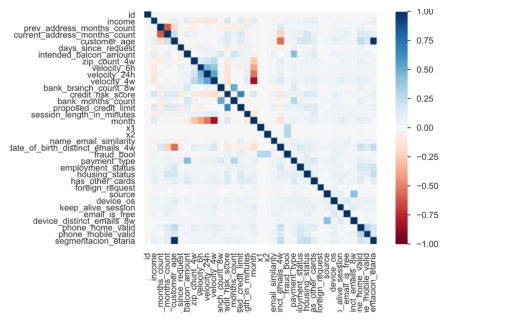

In [32]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Ruta de la imagen
image_path = '/content/sample_data/corr.png'

# Cargar y mostrar la imagen
img = imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

Vemos una correlacion con variables como velocity_4/6/24, pero dado que son variables que sabemos significan similar en diferentes escalas no nos preocupamos, dado que es relevante saber la cantidad de transacciones por periocidades como 4h o 24h.<br>
Por otro lado creamos categorias de edad por lo que haY que eliminar edad normal.

## 4. Preprocesamiento

### 4.1 Declarar `ColumnTransformer`

In [34]:
df_mergemails["month"].unique()

array([2., 7., 1., 3., 6., 4., 5., 0.])

In [35]:
numeric_miss = ['current_address_months_count',
'intended_balcon_amount',
'bank_months_count', 
'session_length_in_minutes'] 

In [36]:
drop_columns = ["customer_age","device_distinct_emails_8w","device_fraud_count","x1","x2",'prev_address_months_count']


num_columns = ['income','current_address_months_count', 'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_6h',
       'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'credit_risk_score',
       'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes',
       'name_email_similarity', 'date_of_birth_distinct_emails_4w']

cat_columns = ['payment_type','employment_status', 'housing_status',
                'has_other_cards','foreign_request','source','device_os',
                'keep_alive_session','segmentacion_etaria','phone_home_valid','phone_mobile_valid','email_is_free']

ord_columns = ['month']
ordinal_cat = [[0, 1, 2, 3, 4, 5, 6, 7]]

passthrough_columns = ["id","fraud_bool"]


In [37]:
df_mergemails.columns

Index(['id', 'fraud_bool', 'income', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'payment_type', 'zip_count_4w', 'velocity_6h',
       'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
       'employment_status', 'credit_risk_score', 'housing_status',
       'bank_months_count', 'has_other_cards', 'proposed_credit_limit',
       'foreign_request', 'source', 'session_length_in_minutes', 'device_os',
       'keep_alive_session', 'device_fraud_count', 'month', 'x1', 'x2',
       'name_email_similarity', 'date_of_birth_distinct_emails_4w',
       'email_is_free', 'device_distinct_emails_8w', 'phone_home_valid',
       'phone_mobile_valid', 'segmentacion_etaria'],
      dtype='object')

In [38]:
import numpy as np

In [39]:
df_mergemails.drop(columns=drop_columns, inplace=True)
df_mergemails[numeric_miss] = df_mergemails[numeric_miss].replace(-1, np.nan)

In [40]:
df_mergemails.columns

Index(['id', 'fraud_bool', 'income', 'current_address_months_count',
       'days_since_request', 'intended_balcon_amount', 'payment_type',
       'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
       'bank_branch_count_8w', 'employment_status', 'credit_risk_score',
       'housing_status', 'bank_months_count', 'has_other_cards',
       'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session', 'month',
       'name_email_similarity', 'date_of_birth_distinct_emails_4w',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
       'segmentacion_etaria'],
      dtype='object')

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### 4.2 Transformar datos

In [42]:
# Preprocesador Compuesto: Inputación + Escalamiento/Codificación.

# Pipeline Numerica
num_pipe = Pipeline(
    steps=[
        ("imputer_num", IterativeImputer(random_state=0)),
        ("scaler", StandardScaler()),
    ]
)

# Pipeline categorica
cat_pipe = Pipeline(
    steps=[
        ("imputer_cat", SimpleImputer(strategy="constant", fill_value="missing")),
        ("onehot", OneHotEncoder(sparse=False, handle_unknown="ignore")),
    ]
)

# Pipeline Ordinal
ord_pipe = Pipeline(
    steps=[
        ("imputer_ord", SimpleImputer(strategy="constant", fill_value=-1)),
        ("ordinal", OrdinalEncoder(categories=ordinal_cat)),
    ]
)

# Preprocesador Compuesto
prep = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_columns),
        ("cat", cat_pipe, cat_columns),
        ("ord", ord_pipe, ord_columns),
    ],remainder="passthrough"
)

prep

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer_num',
                                                  IterativeImputer(random_state=0)),
                                                 ('scaler', StandardScaler())]),
                                 ['income', 'current_address_months_count',
                                  'days_since_request',
                                  'intended_balcon_amount', 'zip_count_4w',
                                  'velocity_6h', 'velocity_24h', 'velocity_4w',
                                  'bank_branch_count_8w', 'credit_risk_score',
                                  'ban...
                                 ['payment_type', 'employment_status',
                                  'housing_status', 'has_other_cards',
                                  'foreign_request', 'source', 'device_os',
                                  'keep_alive_session', 'segmentacion_etaria',
                                  'phone_home_valid', 'phone_mobile_valid',
                                  'email_is_free']),
                                ('ord',
                                 Pipeline(steps=[('imputer_ord',
                                                  SimpleImputer(fill_value=-1,
                                                                strategy='constant')),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[[0,
                                                                              1,
                                                                              2,
                                                                              3,
                                                                              4,
                                                                              5,
                                                                              6,
                                                                              7]]))]),
                                 ['month'])])

In [43]:
df_preprocesado = prep.fit_transform(df_mergemails)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [44]:
import pandas as pd

In [45]:
df_preprocesado = pd.DataFrame(df_preprocesado)
df_preprocesado



,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.420661,2.188664,-0.174633,-0.494630,-0.546784,-0.051301,-0.492381,0.915507,-0.422329,0.108395,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,729517.0,0.0
1,0.767532,0.431094,-0.177515,-0.224200,-0.257723,-0.900103,-1.288948,-1.829110,2.965782,-0.479575,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,7.0,149585.0,0.0
2,1.114403,0.761304,-0.180367,0.955043,3.017266,0.123479,-0.310357,0.664778,-0.388533,0.962353,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,64486.0,0.0
3,-0.273081,-0.154763,-0.175187,-0.480554,0.186747,0.832367,0.208601,0.385608,1.417474,-0.017598,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,825283.0,0.0
4,1.114403,-0.644752,-0.178458,-0.487397,-0.982965,-0.075500,0.629428,0.226780,-0.422329,-0.409579,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,8308.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873766,-1.660566,1.709327,-0.175441,-0.445324,0.287245,-0.967166,-1.015955,-0.503947,-0.420217,0.640369,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,707063.0,0.0
873767,-0.273081,-0.740619,-0.170059,-0.477587,-0.496017,2.590137,2.273259,0.836884,-0.413880,0.528374,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,784606.0,0.0
873768,0.767532,-1.060177,-0.179477,-0.435262,-0.621380,-1.253749,-0.725474,0.254614,-0.403319,1.060348,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,216375.0,0.0
873769,0.420661,-0.868443,0.104862,0.091946,-0.341644,-0.299649,1.109774,0.144535,-0.405431,-0.241587,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,41856.0,0.0


In [46]:
# Obtener los nombres de las columnas generadas
column_names = prep.get_feature_names_out()
column_names

array(['num__income', 'num__current_address_months_count',
       'num__days_since_request', 'num__intended_balcon_amount',
       'num__zip_count_4w', 'num__velocity_6h', 'num__velocity_24h',
       'num__velocity_4w', 'num__bank_branch_count_8w',
       'num__credit_risk_score', 'num__bank_months_count',
       'num__proposed_credit_limit', 'num__session_length_in_minutes',
       'num__name_email_similarity',
       'num__date_of_birth_distinct_emails_4w', 'cat__payment_type_AA',
       'cat__payment_type_AB', 'cat__payment_type_AC',
       'cat__payment_type_AD', 'cat__payment_type_AE',
       'cat__employment_status_CA', 'cat__employment_status_CB',
       'cat__employment_status_CC', 'cat__employment_status_CD',
       'cat__employment_status_CE', 'cat__employment_status_CF',
       'cat__employment_status_CG', 'cat__housing_status_BA',
       'cat__housing_status_BB', 'cat__housing_status_BC',
       'cat__housing_status_BD', 'cat__housing_status_BE',
       'cat__housing_status

In [47]:
# Obtener los nombres de las columnas generadas
column_names = prep.get_feature_names_out()

# Asignar los nombres de las columnas al DataFrame
df_preprocesado.columns = column_names
df_preprocesado = df_preprocesado.rename(columns={"remainder__id": "id","remainder__fraud_bool": "fraud_bool"})
df_preprocesado

,num__income,num__current_address_months_count,num__days_since_request,num__intended_balcon_amount,num__zip_count_4w,num__velocity_6h,num__velocity_24h,num__velocity_4w,num__bank_branch_count_8w,num__credit_risk_score,...,cat__segmentacion_etaria_Persona Mayor,cat__phone_home_valid_0.0,cat__phone_home_valid_1.0,cat__phone_mobile_valid_0.0,cat__phone_mobile_valid_1.0,cat__email_is_free_0.0,cat__email_is_free_1.0,ord__month,id,fraud_bool
0,0.420661,2.188664,-0.174633,-0.494630,-0.546784,-0.051301,-0.492381,0.915507,-0.422329,0.108395,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,729517.0,0.0
1,0.767532,0.431094,-0.177515,-0.224200,-0.257723,-0.900103,-1.288948,-1.829110,2.965782,-0.479575,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,7.0,149585.0,0.0
2,1.114403,0.761304,-0.180367,0.955043,3.017266,0.123479,-0.310357,0.664778,-0.388533,0.962353,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,64486.0,0.0
3,-0.273081,-0.154763,-0.175187,-0.480554,0.186747,0.832367,0.208601,0.385608,1.417474,-0.017598,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,825283.0,0.0
4,1.114403,-0.644752,-0.178458,-0.487397,-0.982965,-0.075500,0.629428,0.226780,-0.422329,-0.409579,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,8308.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873766,-1.660566,1.709327,-0.175441,-0.445324,0.287245,-0.967166,-1.015955,-0.503947,-0.420217,0.640369,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,707063.0,0.0
873767,-0.273081,-0.740619,-0.170059,-0.477587,-0.496017,2.590137,2.273259,0.836884,-0.413880,0.528374,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,784606.0,0.0
873768,0.767532,-1.060177,-0.179477,-0.435262,-0.621380,-1.253749,-0.725474,0.254614,-0.403319,1.060348,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,216375.0,0.0
873769,0.420661,-0.868443,0.104862,0.091946,-0.341644,-0.299649,1.109774,0.144535,-0.405431,-0.241587,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0,41856.0,0.0


## 5. Visualización en Baja Dimensionalidad

### 5. Visualización en baja dimensionalidad [1 Punto]

Programar un script para proyectar los datos en baja dimensionalidad usando `PCA` o `UMAP`.

**Notas**: 

- Para realizar las proyecciones no consideren la variable `fraud_bool`, ya que esto provocaría un _data leakage_ (i.e., usar información del futuro para analizar el mismo fenómeno que quieren descubrir).
- Utilice un muestreo significativo del dataframe (10k a 25k ejemplos) para generar las proyecciones. De lo contrario, probablemente el proyector no sea capaz de asignar todos los recursos necesarios y lance alguna excepción.

Luego, por cada segmento etario generado en la sección 2, implemente un gráfico de dispersión (idealmente en plotly express) la proyección en 2D generada y coloree cada punto según la etiqueta `fraud_bool`.

Reportar si existen patrones y/o relaciones interesantes con respecto a variables de interés.

### 5.1 Muestrear dataframe

In [48]:
escaled_features = df_preprocesado.sample(n=25000, random_state=42)
escaled_features2 = escaled_features.iloc[:, :-2]


### 5.2 Proyectar y agregar proyecciones al dataframe de muestreo

In [49]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=a8b0f2bf39a55370727a71d344fe439a3909c422495dbdc62ddfb9345c5b20fd
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=035489efbb779bbd721327cfa292132a4b1cdb5d22561cd2b299e93c5593851d
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [50]:
from umap import UMAP

proyector = UMAP(random_state=88, n_neighbors=20, min_dist=0.15)

projections = proyector.fit_transform(escaled_features2)


In [51]:
projections.shape

(25000, 2)

In [52]:
projections

array([[ 7.482786 ,  6.753935 ],
       [ 7.325669 ,  4.158952 ],
       [10.005495 ,  4.100486 ],
       ...,
       [11.954385 ,  5.532923 ],
       [ 7.2383733,  3.7251573],
       [ 7.0475116,  8.499856 ]], dtype=float32)

### 5.3 Visualizar según rangos etarios

In [53]:
pd.DataFrame(projections, columns=["x", "y"])

,x,y
0,7.482786,6.753935
1,7.325669,4.158952
2,10.005495,4.100486
3,11.293278,6.086926
4,9.739141,4.511358
...,...,...
24995,6.260585,5.269108
24996,10.832746,5.242330
24997,11.954385,5.532923
24998,7.238373,3.725157


In [54]:
from pandas.core.arrays import categorical
# este dataframe lo estaremos usando para graficar de aquí en adelante
fig_df = pd.concat(
    [
        escaled_features.loc[:, 'fraud_bool'].reset_index(drop = True),
        escaled_features2.reset_index(drop = True),
        pd.DataFrame(projections, columns=["x", "y"]),
    ],
    axis=1,
)

fig_df["fraud_bool"] = fig_df["fraud_bool"].astype("category")

In [55]:

edades = ['cat__segmentacion_etaria_Adulto',
       'cat__segmentacion_etaria_Adulto-Joven',
       'cat__segmentacion_etaria_Joven',
       'cat__segmentacion_etaria_Persona Mayor']

def get_scatter(fig_df, color_col,i):
    fig = px.scatter(
        fig_df,
        x="x",
        y="y",
        color=color_col,
        labels ={"fraud_bool": i },
        range_x=(fig_df["x"].min() - 1, fig_df["x"].max() + 1),
        range_y=(fig_df["y"].min() - 1, fig_df["y"].max() + 1),
    )
    return fig

for i in edades:
      fig =get_scatter(fig_df[fig_df[i]==1], "fraud_bool",i)
      fig.show()

**Reporte visualización**

Podemos ver que la mayor concentración de fraude se encuentra en la categorio de 'Adulto' y 'Persona Mayor', dentro de estas mismas podemos ver algunas aglomeraciones que pueden guiarnos a pensar que existen ciertos clusters con cualidades especificas en esas categorias que podrian identificar el fraude

## 6. Anomalías


### 6. Explorar Anomalías [1.5 Puntos]

Proponer una técnica para detectar clientes fraudulentos en base a detección de anomalías. 
Al igual que el punto anterior, la técnica que proponga debe ser aplicada por separado en los diferentes segmentos etarios descritos en el punto 2 (es decir, debe entrenar un detector de anomalías para cada uno de estos grupos). 

Luego, al igual que el punto anterior, genere un gráfico de dispersión con las proyecciones 2D en donde el coloreado sea ahora las etiquetas predichas por el detector de anomalías.

Por último, usando queries de numpy/pandas, calcule dos ratios (P y R):

- P: Cantidad de ejemplos predichos correctamente como fraude / cantidad total de datos predichos como fraude.
- R: Cantidad de ejemplos predichos correctamente como fraude / cantidad total de ejemplos que eran realmente fraude.


De los resultados obtenidos responda las siguientes preguntas:

- ¿Qué significan los ratios y sus valores?
- ¿Qué tan correctas fueron las predicciones realizadas por su modelo según los ratios calculados?
- ¿Son coherentes los resultados obtenidos?.
- ¿Cómo se comportan los casos de fraudes para los diferentes rangos etarios?

Justifique cada una de sus respuestas.

### 6.1 Implementar detector de anomalías sobre dataframe de muestreo

In [109]:
data_train, data_test, ytrain, ytest = train_test_split(df_preprocesado, df_preprocesado['fraud_bool'], test_size=0.3, stratify=df_preprocesado['fraud_bool'])

In [120]:
train = df_preprocesado[~df_preprocesado['id'].isin(escaled_features['id'])]
train.drop(columns = "id")
X_train = train[train.columns[:-1]]
Y_train = train[train.columns[-1]]

escaled_features.drop(columns='id')
X_test = escaled_features[escaled_features.columns[:-1]]
Y_test = escaled_features[escaled_features.columns[-1]]

In [121]:
Y_train.value_counts()


0.0    839392
1.0      9379
Name: fraud_bool, dtype: int64

In [123]:
from imblearn.over_sampling import SMOTE
#oversampling fraud 1
# Separar características (X) y etiquetas (y)
X = train.drop('fraud_bool', axis=1)
y = train['fraud_bool']

# Aplicar SMOTE para oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar el nuevo balance de clases
print(y_resampled.value_counts())

0.0    839392
1.0    839392
Name: fraud_bool, dtype: int64


In [130]:
train.loc[train.fraud_bool == 0].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      8,
                 9,     10,
            ...
            873761, 873762, 873763, 873764, 873765, 873766, 873767, 873768,
            873769, 873770],
           dtype='int64', length=839392)

In [133]:

# subsampling sobre la clase 0
train = train.reset_index(drop = True)
idx = np.random.choice(train.loc[train.fraud_bool == 0].index, size=830013, replace=False)
data_usampled = train.drop(train.iloc[idx].index)
print("Data undersampled on class '0'")
print(data_usampled['fraud_bool'].value_counts())

Data undersampled on class '0'
0.0    9379
1.0    9379
Name: fraud_bool, dtype: int64


In [124]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report

In [125]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
pred= dt.predict(X_test)


In [126]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     24757
         1.0       0.05      0.08      0.06       243

    accuracy                           0.98     25000
   macro avg       0.52      0.53      0.53     25000
weighted avg       0.98      0.98      0.98     25000



In [127]:
dt = DecisionTreeClassifier()
dt.fit(X_resampled, y_resampled)
pred= dt.predict(X_test)

In [128]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     24757
         1.0       0.04      0.06      0.05       243

    accuracy                           0.98     25000
   macro avg       0.52      0.52      0.52     25000
weighted avg       0.98      0.98      0.98     25000



In [138]:
X_usampled = data_usampled[data_usampled.columns[:-1]]
Y_usampled = data_usampled[data_usampled.columns[-1]]

In [139]:
dt = DecisionTreeClassifier()
dt.fit(X_usampled, Y_unsampled)
pred= dt.predict(X_test)

In [140]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      0.69      0.81     24757
         1.0       0.02      0.70      0.04       243

    accuracy                           0.69     25000
   macro avg       0.51      0.69      0.43     25000
weighted avg       0.99      0.69      0.81     25000



### 6.2 Agregar resultados a dataframe de muestreo

In [142]:
escaled_features["predicho"] = pred
escaled_features

,num__income,num__current_address_months_count,num__days_since_request,num__intended_balcon_amount,num__zip_count_4w,num__velocity_6h,num__velocity_24h,num__velocity_4w,num__bank_branch_count_8w,num__credit_risk_score,...,cat__phone_home_valid_0.0,cat__phone_home_valid_1.0,cat__phone_mobile_valid_0.0,cat__phone_mobile_valid_1.0,cat__email_is_free_0.0,cat__email_is_free_1.0,ord__month,id,fraud_bool,predicho
476856,0.767532,-0.623448,0.080958,2.031790,0.763833,0.145224,-0.069930,0.522050,0.162775,-1.123543,...,1.0,0.0,0.0,1.0,0.0,1.0,2.0,313556.0,0.0,1.0
331721,1.114403,0.036972,-0.180089,-0.442182,-0.278444,-1.414001,-0.543672,0.515413,-0.411768,0.528374,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,671938.0,0.0,0.0
834950,1.114403,-0.580840,-0.180349,-0.483602,-0.533315,0.451157,0.411072,-0.757188,1.064722,-0.633568,...,0.0,1.0,0.0,1.0,1.0,0.0,5.0,292586.0,0.0,0.0
205695,-1.660566,0.143492,-0.178735,1.562886,-0.221461,-0.817928,-0.835712,-0.806115,-0.401207,-0.507574,...,0.0,1.0,1.0,0.0,1.0,0.0,6.0,40722.0,0.0,0.0
104514,1.114403,-0.101503,-0.178444,-0.473505,-0.215244,0.161709,0.339638,-0.492734,-0.386421,-0.465576,...,0.0,1.0,0.0,1.0,1.0,0.0,4.0,343485.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817771,-1.660566,-1.017570,-0.175314,-0.466225,-0.512594,0.909575,1.438371,0.684870,-0.424442,-1.641517,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,115803.0,0.0,0.0
413567,-0.619952,-0.836487,-0.173385,0.180103,-0.297093,-0.479632,-1.034816,-0.441317,-0.396982,-0.031598,...,0.0,1.0,0.0,1.0,0.0,1.0,5.0,297417.0,0.0,0.0
247335,0.767532,-0.911050,-0.177891,-0.457924,0.115259,-1.610456,-1.171728,-0.371999,1.335095,-0.941552,...,0.0,1.0,0.0,1.0,0.0,1.0,6.0,317003.0,0.0,0.0
103500,-1.660566,-0.612796,-0.172394,-0.478240,0.175351,0.779779,0.289749,0.933508,1.508303,-1.907504,...,0.0,1.0,1.0,0.0,1.0,0.0,2.0,36163.0,0.0,0.0


### 6.3 Visualizar según rangos etarios

In [143]:
fig_df = pd.concat(
    [
        escaled_features.loc[:, 'predicho'].reset_index(drop = True),
        escaled_features2.reset_index(drop = True),
        pd.DataFrame(projections, columns=["x", "y"]),
    ],
    axis=1,
)

fig_df["predicho"] = fig_df["predicho"].astype("category")

In [145]:
edades = ['cat__segmentacion_etaria_Adulto',
       'cat__segmentacion_etaria_Adulto-Joven',
       'cat__segmentacion_etaria_Joven',
       'cat__segmentacion_etaria_Persona Mayor']

def get_scatter(fig_df, color_col,i):
    fig = px.scatter(
        fig_df,
        x="x",
        y="y",
        color=color_col,
        labels ={"predicho": i },
        range_x=(fig_df["x"].min() - 1, fig_df["x"].max() + 1),
        range_y=(fig_df["y"].min() - 1, fig_df["y"].max() + 1),
    )
    return fig

for i in edades:
      fig =get_scatter(fig_df[fig_df[i]==1], "predicho",i)
      fig.show()

### 6.4 Calcular ratios y responder

Lo ratios fueron calculados anteriormente mediante classificationReport().

P o Precisión mide la cantidad de Fraude clasificado correctamente sobre la cantidad de datos calsificados como Fraude.

R o Recall mide la cantidad de casos clasificados como Fraudo sobre la cantidad que realmente eran fraude.

Utilice un clasificador mediante arboles de decision, y como habia una gran cantidad de desbalance entre fraude y no fraude, aplica Under y Over sampling para calcular las metricas en los 3 casos, datos originales, undersampling y oversampling. Decidi guiarme por quien tuviera el mejor Recall, dado que considero que es más importante poder identificar fraude correctamente que el daño de considerar una transaccion normal como fraude.

Para el ovesampling recurri a SMOTE (Synthetic Minority Over-sampling Technique) es un algoritmo de sobremuestreo utilizado para abordar el desequilibrio de clases en conjuntos de datos desequilibrados.
MOTE genera ejemplos sintéticos de la clase minoritaria al crear nuevas instancias interpoladas entre las instancias existentes de la clase minoritaria. El algoritmo selecciona aleatoriamente una instancia de la clase minoritaria y encuentra sus vecinos más cercanos. Luego, crea nuevas instancias en el espacio entre la instancia seleccionada y sus vecinos, aumentando así la cantidad de ejemplos de la clase minoritaria.

Lamentamblemente la Precisión de los arboles reportado fue muy baja obteniendo 5%,4% y 2%. Esto implico que al graficar reduciendo la dimensionalidad mediante UMP encontramos que los arboles estan clasificando la gran mayoria com fraude. 
Lo cual no permite abstraer mayor información, más que deberiamos buscar otros modelos de clasificación o algun erorr cometido durante el entranamiento. Lo podria haber ocurrido en el preprocesamiento pero es algo que me queda pendiente de revisar.